<a href="https://colab.research.google.com/github/protasiofernando/health_insurance/blob/main/Kaggle_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Data Loading & Initial Checks

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load datasets
data = pd.read_csv('insurance.csv')
new_clients = pd.read_excel('new_clients.xlsx')

# Check for missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Missing values percentage:\n", missing_percentage)

Missing values percentage:
 age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#2) Data Splitting

In [5]:
# Separate features and target
X = data.drop(columns=['charges'])
y = data['charges']

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1070, 6)
Test set size: (268, 6)


#3) Feature Engineering

In [6]:
# Identify categorical and numerical columns
categorical_cols = list(X_train.select_dtypes(include=['object', 'category']).columns)
numerical_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Show unique values in categorical features
for col in categorical_cols:
    print(f"{col}: {data[col].unique().tolist()}")

sex: ['female', 'male']
smoker: ['yes', 'no']
region: ['southwest', 'southeast', 'northwest', 'northeast']


#4) Preprocessing Pipeline

In [7]:
from sklearn.pipeline import Pipeline

# Create preprocessing pipeline
preprocessor = Pipeline([
    ('encoder', ColumnTransformer([
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ], remainder='passthrough')),
    ('scaler', StandardScaler())
])

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
new_clients_processed = preprocessor.transform(new_clients)

# Get feature names
encoded_cols = preprocessor.named_steps['encoder'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
final_cols = list(encoded_cols) + numerical_cols

# Convert to DataFrames
X_train_df = pd.DataFrame(X_train_processed, columns=final_cols, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=final_cols, index=X_test.index)
new_clients_df = pd.DataFrame(new_clients_processed, columns=final_cols, index=new_clients.index)

#5) Model Training & Evaluation

Training Models: 100%|██████████| 12/12 [00:00<00:00, 45.18it/s]



=== FINAL MODEL COMPARISON ===
+-----------------------+---------+----------+-------+---------------------+
| Model                 |     MAE |     RMSE |    R² |   Training Time (s) |
|-----------------------+---------+----------+-------+---------------------|
| XGBoost               | 2440.07 |  4254.78 |  0.88 |                0.05 |
| Gradient Boosting     | 2454.47 |  4335.04 |  0.88 |                0.23 |
| Random Forest         | 2533.58 |  4496.86 |  0.87 |                0.60 |
| Polynomial Regression | 2729.50 |  4551.13 |  0.87 |                0.01 |
| AdaBoost              | 3089.72 |  4693.24 |  0.86 |                0.14 |
| Decision Tree         | 2930.77 |  5082.51 |  0.83 |                0.00 |
| K-Neighbors           | 3364.44 |  5461.83 |  0.81 |                0.00 |
| Linear Regression     | 4181.19 |  5796.28 |  0.78 |                0.00 |
| Ridge Regression      | 4182.80 |  5796.98 |  0.78 |                0.00 |
| MLP Regressor         | 5642.66 |  8565.02

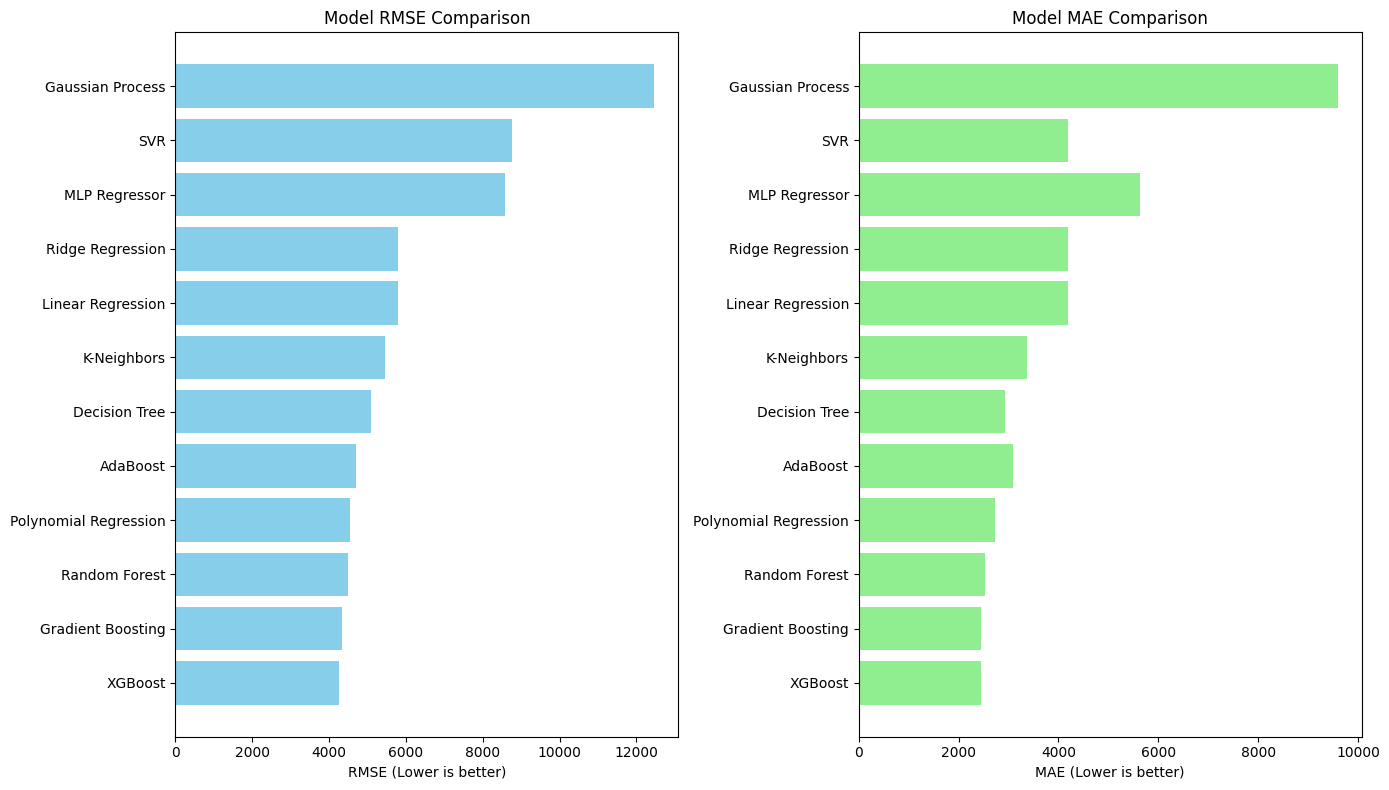

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from joblib import Memory
from tqdm import tqdm
from tabulate import tabulate
import warnings
import os

# 3. Model Configuration
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {
            'alpha': [0.1, 1, 10],
            'solver': ['auto', 'svd']
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            'kernel': ['rbf', 'linear'],
            'C': [0.1, 1, 10],
            'epsilon': [0.01, 0.1]
        }
    },
    "Polynomial Regression": {
        "model": Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ]),
        "params": {
            'linear__fit_intercept': [True, False]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    "AdaBoost": {
        "model": AdaBoostRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    "K-Neighbors": {
        "model": KNeighborsRegressor(),
        "params": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    "MLP Regressor": {
        "model": MLPRegressor(random_state=42, early_stopping=True),
        "params": {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001]
        }
    },
    "Gaussian Process": {
        "model": GaussianProcessRegressor(random_state=42),
        "params": {
            'kernel': [1.0 * RBF(), ConstantKernel()],
            'alpha': [1e-10, 1e-5]
        }
    }
}

# 4. Training Functionality
location = './cachedir'
os.makedirs(location, exist_ok=True)
memory = Memory(location=location, verbose=0)

def get_search_strategy(params):
    total_combinations = 1
    for v in params.values():
        total_combinations *= len(v)

    if total_combinations <= 10 or not params:
        return {'strategy': 'grid', 'n_iter': None}
    elif total_combinations <= 50:
        return {'strategy': 'random', 'n_iter': min(15, total_combinations)}
    else:
        return {'strategy': 'random', 'n_iter': min(20, total_combinations)}

@memory.cache
def train_model(model, params, X_train, y_train):
    strategy = get_search_strategy(params)

    if strategy['strategy'] == 'grid':
        search = GridSearchCV(
            estimator=model,
            param_grid=params,
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            verbose=0
        )
    else:
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=strategy['n_iter'],
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            random_state=42,
            verbose=0
        )

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        search.fit(X_train, y_train)
    return search

# 5. Model Training
results = []
for model_name, config in tqdm(models.items(), desc="Training Models"):
    search = train_model(config["model"], config["params"], X_train_df, y_train)
    y_pred = search.best_estimator_.predict(X_test_df)

    results.append({
        'Model': model_name,
        'Best Parameters': search.best_params_,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred),
        'Training Time (s)': search.refit_time_,
        'Parameters Evaluated': search.n_iter if hasattr(search, 'n_iter') else len(search.cv_results_['params'])
    })

# 6. Results Analysis
results_df = pd.DataFrame(results).sort_values('RMSE')
print("\n=== FINAL MODEL COMPARISON ===")
print(tabulate(results_df[['Model', 'MAE', 'RMSE', 'R²', 'Training Time (s)']],
               headers='keys',
               tablefmt='psql',
               showindex=False,
               floatfmt=".2f"))

# 7. Visualization
plt.figure(figsize=(14, 8))

# Create subplots
plt.subplot(1, 2, 1)
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE (Lower is better)')
plt.title('Model RMSE Comparison')

plt.subplot(1, 2, 2)
plt.barh(results_df['Model'], results_df['MAE'], color='lightgreen')
plt.xlabel('MAE (Lower is better)')
plt.title('Model MAE Comparison')

plt.tight_layout()
plt.show()

## Optmizing XGBoost (the best)

=== PHASE 1: Optimizing learning_rate and n_estimators ===
Best learning_rate: 0.2 (RMSE: 4624.7147)

=== PHASE 2: Optimizing tree structure ===
Best max_depth: 2
Best min_child_weight: 3

=== PHASE 3: Optimizing regularization parameters ===
Best gamma: 0
Best reg_alpha: 0
Best reg_lambda: 0

Training final model with the best parameters...
[0]	Test-rmse:10502.65080
[50]	Test-rmse:4229.89161
[69]	Test-rmse:4234.02119

=== FINAL RESULTS ===
MAE: 2337.14
RMSE: 4234.02
R²: 0.8845

=== COMPARISON ===
Original MAE: 2440.07 | Optimized: 2337.14
Original RMSE: 4254.78 | Optimized: 4234.02
Original R²: 0.8834 | Optimized: 0.8845


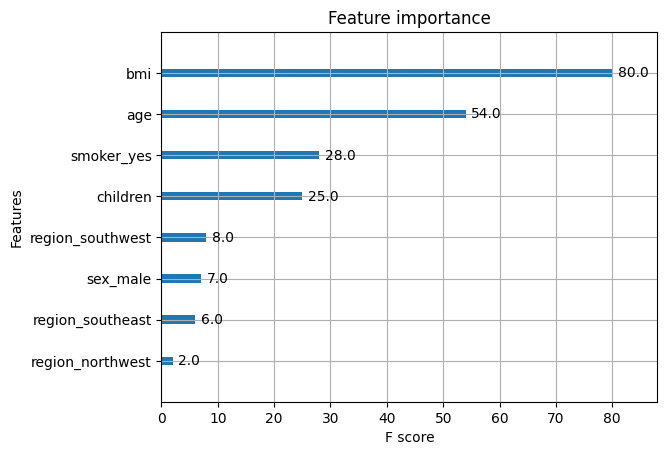

In [9]:
import matplotlib.pyplot as plt
import xgboost as xgb

## 1. Convert data to DMatrix format (more efficient for XGBoost)
dtrain = xgb.DMatrix(X_train_df, label=y_train)
dtest = xgb.DMatrix(X_test_df, label=y_test)

## 2. First Phase: Optimize learning_rate and n_estimators
print("=== PHASE 1: Optimizing learning_rate and n_estimators ===")

# Base parameters
params = {
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42
}

# Search for the best learning_rate
best_score = float('inf')
best_lr = None

for lr in [0.01, 0.05, 0.1, 0.15, 0.2]:
    params['learning_rate'] = lr
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=500,
        nfold=3,
        early_stopping_rounds=20,
        verbose_eval=False
    )
    rmse = cv_results['test-rmse-mean'].min()

    if rmse < best_score:
        best_score = rmse
        best_lr = lr

print(f"Best learning_rate: {best_lr} (RMSE: {best_score:.4f})")

## 3. Second Phase: Optimize tree structure
print("\n=== PHASE 2: Optimizing tree structure ===")

params['learning_rate'] = best_lr
best_params = params.copy()

# Testing combinations of max_depth and min_child_weight
for depth in [2, 3, 4, 5]:
    for child_weight in [1, 3, 5]:
        params['max_depth'] = depth
        params['min_child_weight'] = child_weight

        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=500,
            nfold=3,
            early_stopping_rounds=20,
            verbose_eval=False
        )
        rmse = cv_results['test-rmse-mean'].min()

        if rmse < best_score:
            best_score = rmse
            best_params.update({
                'max_depth': depth,
                'min_child_weight': child_weight
            })

print(f"Best max_depth: {best_params['max_depth']}")
print(f"Best min_child_weight: {best_params['min_child_weight']}")

## 4. Third Phase: Regularization
print("\n=== PHASE 3: Optimizing regularization parameters ===")

for gamma in [0, 0.1, 0.2]:
    for reg_alpha in [0, 0.1, 1]:
        for reg_lambda in [0, 0.1, 1]:
            params.update({
                'gamma': gamma,
                'reg_alpha': reg_alpha,
                'reg_lambda': reg_lambda
            })

            cv_results = xgb.cv(
                params,
                dtrain,
                num_boost_round=500,
                nfold=3,
                early_stopping_rounds=20,
                verbose_eval=False
            )
            rmse = cv_results['test-rmse-mean'].min()

            if rmse < best_score:
                best_score = rmse
                best_params.update({
                    'gamma': gamma,
                    'reg_alpha': reg_alpha,
                    'reg_lambda': reg_lambda
                })

print(f"Best gamma: {best_params.get('gamma', 0)}")
print(f"Best reg_alpha: {best_params.get('reg_alpha', 0)}")
print(f"Best reg_lambda: {best_params.get('reg_lambda', 0)}")

## 5. Train final model
print("\nTraining final model with the best parameters...")
final_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round=500,
    evals=[(dtest, "Test")],
    early_stopping_rounds=20,
    verbose_eval=50
)

## 6. Evaluation
y_pred = final_model.predict(dtest)

print("\n=== FINAL RESULTS ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

## 7. Comparison with the original
print("\n=== COMPARISON ===")
print(f"Original MAE: 2440.07 | Optimized: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Original RMSE: 4254.78 | Optimized: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Original R²: 0.8834 | Optimized: {r2_score(y_test, y_pred):.4f}")

## 8. Feature importance visualization
xgb.plot_importance(final_model, max_num_features=10)
plt.show()

#6) Predictions on new clients


=== PREDICTION ANALYSIS ===
count    15000.000000
mean     22376.113281
std      15427.794922
min        824.729004
25%       9087.385742
50%      16930.337891
75%      40318.511719
max      53744.703125
Name: predicted_charges, dtype: float64


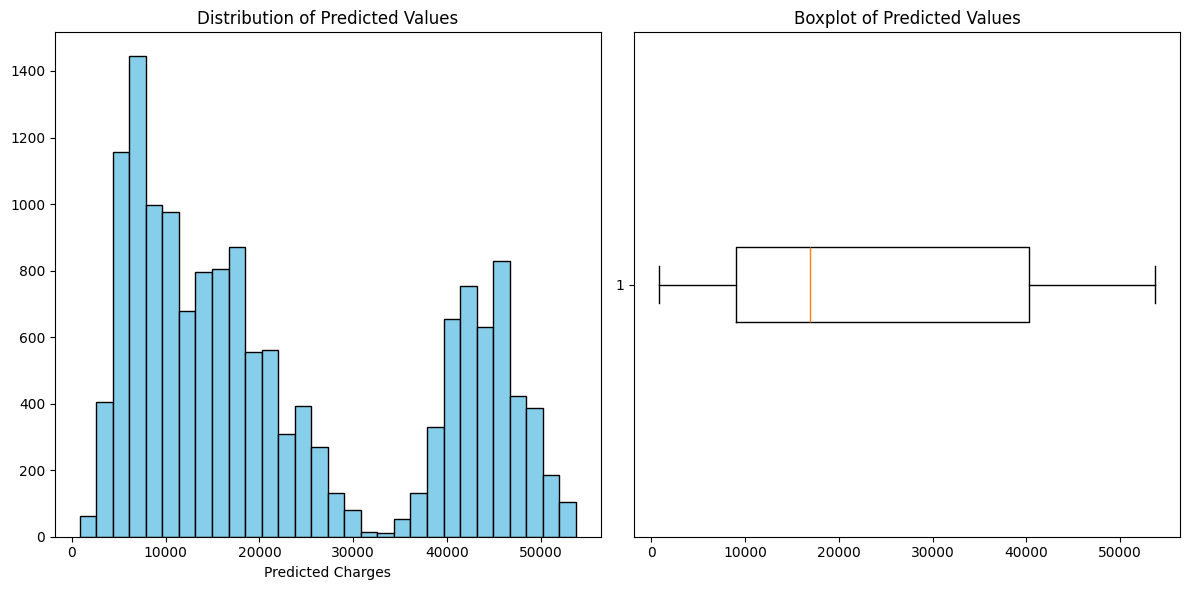


Predictions saved to 'new_customers_predictions.xlsx'

Prediction sample:
        age       bmi  predicted_charges
0  0.756572 -0.718542       10588.343750
1 -0.665156  1.764671       44150.308594
2 -0.736243  3.436701       40567.230469
3  0.969832  2.307667       46334.324219
4  1.112004 -0.718542       13693.141602
5  0.472227  2.347398       44882.914062
6 -0.451897  3.699922       42588.175781
7 -0.949502  2.423550        5304.542969
8 -1.304934  0.188658        5290.471191
9 -0.949502  1.221675        5796.997559


In [ ]:
# 1. Verify and prepare new data
new_clients_df = new_clients_df[X_train_df.columns]
dnew = xgb.DMatrix(new_clients_df)

# 2. Make predictions
predictions = final_model.predict(dnew)

# 3. Create DataFrame with results
results = new_clients_df.copy()
results['predicted_charges'] = predictions

# 4. Descriptive analysis
print("\n=== PREDICTION ANALYSIS ===")
print(results['predicted_charges'].describe())

# 5. Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(predictions, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Charges')

plt.subplot(1, 2, 2)
plt.boxplot(predictions, vert=False)
plt.title('Boxplot of Predicted Values')
plt.tight_layout()
plt.show()

# 6. Save to Excel
results.to_excel('new_customers_predictions.xlsx', index=False, sheet_name='Predictions')
print("\nPredictions saved to 'new_customers_predictions.xlsx'")

# 7. Display sample
print("\nPrediction sample:")
print(results.head(10)[['age', 'bmi', 'predicted_charges']])